In [1]:
import eqnet_format
from eqnet_format import get_random_ksat, cnf_to_eqnet, get_encoder, l2, get_false_encoding, DPLL, mean, stdev
import scipy

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
import random

In [22]:
def percent_pairs_correct(falses, trues):
    good = 0
    bad = 0
    # it's O(N**2), but it can be rewritten to O(N)
    for f in falses:
        for t in trues:
            if f <= t:
                good += 1
            else:
                bad += 1
    return good/(good+bad)

def random_pairs_correct(falses, trues):
    # This is a really stupid implementation. It should (can) be derived from equations, I think.
    results = []
    samples = 100
    for i in range(samples):
        falses = [random.gauss(0, 1) for f in falses]
        trues = [random.gauss(0, 1) for t in trues]
        results.append(percent_pairs_correct(falses, trues))
    results = sorted(results)
    return "aprox. 90% likely to be between {} and {}".format(results[5], results[-6])

In [23]:
ENCODER = get_encoder()
FALSE_ENCODING = ENCODER.get_encoding(cnf_to_eqnet([[1], [-1]]))
def dist_to_false(x):
    return l2(x, FALSE_ENCODING)

Compiling Methods...
Compilation Finished...


In [24]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy

In [25]:
def gen_and_print(num, k, n, m):
    trues_lin = []
    trues_log = []
    
    falses_lin = []
    falses_log = []
    
    for i in range(num):
        rsat = get_random_ksat(k, n, m)
        clauses = [list(clause) for clause in rsat.clauses]
        
        encoding_lin = ENCODER.get_encoding(cnf_to_eqnet(clauses, log_depth=False))
        encoding_log = ENCODER.get_encoding(cnf_to_eqnet(clauses, log_depth=True))
        
        dist_lin = dist_to_false(encoding_lin)
        dist_log = dist_to_false(encoding_log)
        
        if DPLL().run(rsat):
            trues_lin.append(dist_lin)
            trues_log.append(dist_log)
        else:
            falses_lin.append(dist_lin)
            falses_log.append(dist_log)
    
    print("#trues_lin: {}; avg dist: {}; stdev dist: {}".format(
        len(trues_lin), mean(trues_lin), stdev(trues_lin)))
    print("#trues_log: {}; avg dist: {}; stdev dist: {}".format(
        len(trues_log), mean(trues_log), stdev(trues_log)))

    print("#falses_lin: {}; avg dist: {}; stdev dist: {}".format(
        len(falses_lin), mean(falses_lin), stdev(falses_lin)))
    print("#falses_log: {}; avg dist: {}; stdev dist: {}".format(
        len(falses_log), mean(falses_log), stdev(falses_log)))
    
    print("lin percent part correct: {}".format(percent_pairs_correct(falses_lin, trues_lin)))
    print("log percent part correct: {}".format(percent_pairs_correct(falses_log, trues_log)))
    print("random percent part correct: {}".format(random_pairs_correct(falses_log, trues_log)))

    name = "{}-sats with {} vars and {} clauses".format(k, n, m)
    plt.title("Dist of lin of True {}".format(name))
    plt.hist(trues_lin, bins=numpy.linspace(0, 1.5, 21))
    plt.show()
    plt.title("Dist of log of True {}".format(name))
    plt.hist(trues_log, bins=numpy.linspace(0, 1.5, 21))
    plt.show()
    
    print("Correlation: {}, p-value: {}".format(*scipy.stats.pearsonr(trues_lin, trues_log)))
    plt.title("log vs lin of True {}".format(name))
    plt.scatter(trues_lin, trues_log)
    plt.show()
    
    plt.title("Dist of lin of False {}".format(name))
    plt.hist(falses_lin, bins=numpy.linspace(0, 1.5, 21))
    plt.show()
    plt.title("Dist of log of False {}".format(name))
    plt.hist(falses_log, bins=numpy.linspace(0, 1.5, 21))
    plt.show()
    
    print("Correlation: {}, p-value: {}".format(*scipy.stats.pearsonr(falses_lin, falses_log)))
    plt.title("log vs lin of False {}".format(name))
    plt.scatter(falses_lin, falses_log)
    plt.show()

#trues_lin: 910; avg dist: 0.7749805370202432; stdev dist: 0.3113844070195752
#trues_log: 910; avg dist: 0.7749805370202432; stdev dist: 0.3113844070195752
#falses_lin: 90; avg dist: 0.6582596297065417; stdev dist: 0.3290974249049309
#falses_log: 90; avg dist: 0.6582596297065417; stdev dist: 0.3290974249049309
lin percent part correct: 0.621074481074481
log percent part correct: 0.621074481074481
random percent part correct: aprox. 90% likely to be between 0.44395604395604393 and 0.5441636141636141


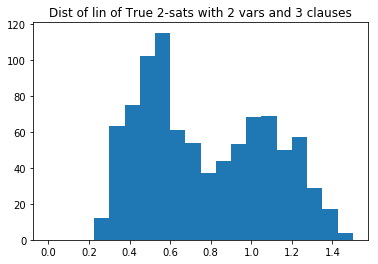

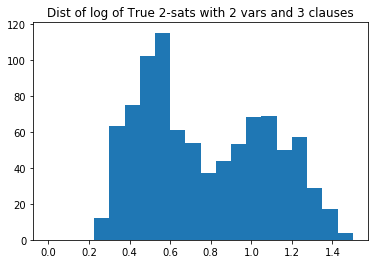

Correlation: 1.0, p-value: 0.0


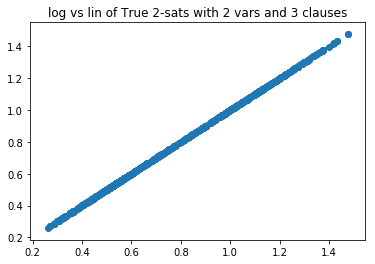

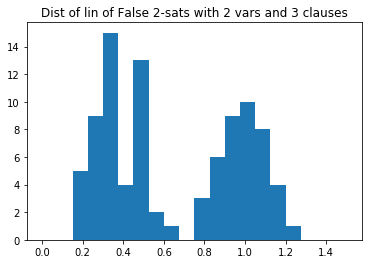

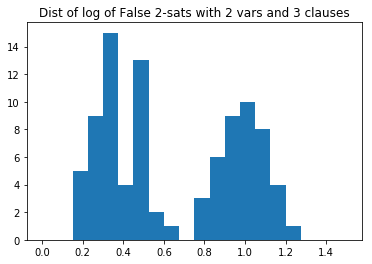

Correlation: 1.0, p-value: 0.0


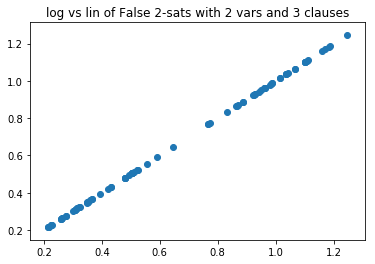

In [26]:
# for 2-SAT with 3 clauses log and linear trees are equivalent, so we expect the same results!
gen_and_print(1000, 2, 2, 3)

#trues_lin: 823; avg dist: 0.781177295731745; stdev dist: 0.3049414313430865
#trues_log: 823; avg dist: 0.7895519190975991; stdev dist: 0.2673177094536
#falses_lin: 177; avg dist: 0.7826367878476105; stdev dist: 0.31213280490846623
#falses_log: 177; avg dist: 0.7811300592065531; stdev dist: 0.2973740826475694
lin percent part correct: 0.5021727042444961
log percent part correct: 0.5045067309210481
random percent part correct: aprox. 90% likely to be between 0.4587323489232586 and 0.5419609942953643


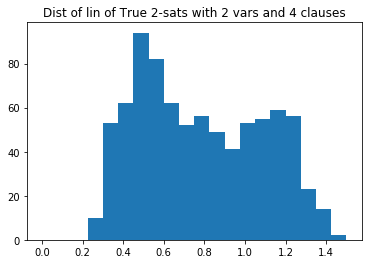

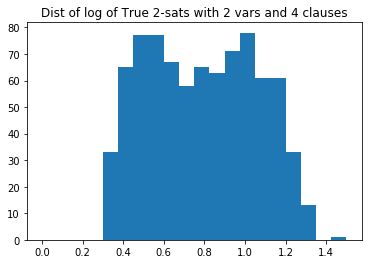

Correlation: 0.7975125908851624, p-value: 2.3004760051205508e-182


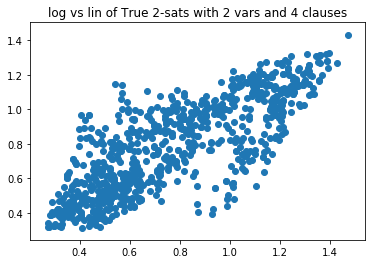

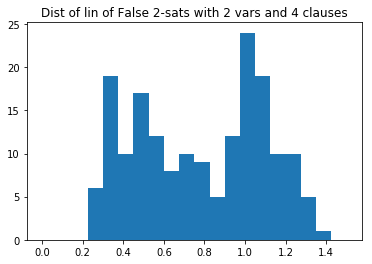

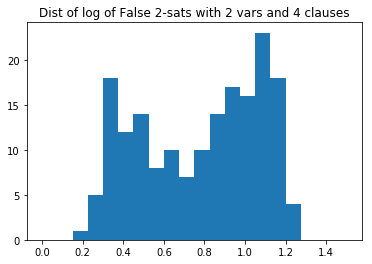

Correlation: 0.7970426082611084, p-value: 3.5375749926683776e-40


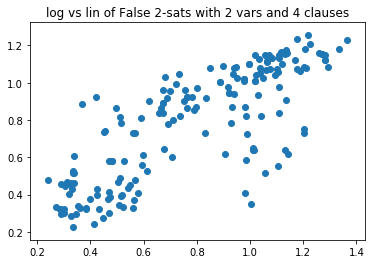

In [27]:
gen_and_print(1000, 2, 2, 4)

#trues_lin: 706; avg dist: 0.7866075823225989; stdev dist: 0.29390074328674204
#trues_log: 706; avg dist: 0.7936463152551786; stdev dist: 0.24899941552646926
#falses_lin: 294; avg dist: 0.7388130161835222; stdev dist: 0.3086859630009907
#falses_log: 294; avg dist: 0.7736102757202524; stdev dist: 0.2715396548089854
lin percent part correct: 0.5511071284037694
log percent part correct: 0.5219932165500761
random percent part correct: aprox. 90% likely to be between 0.46225260642500626 and 0.5324478233219634


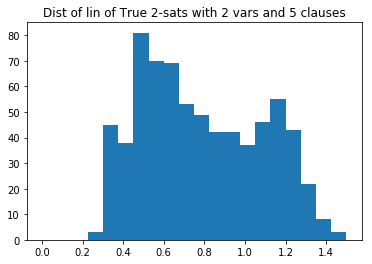

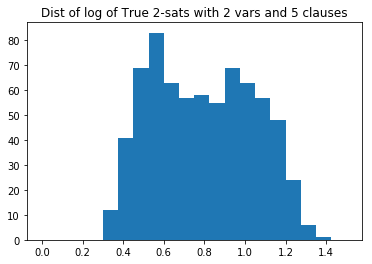

Correlation: 0.7941485643386841, p-value: 2.0270693765620257e-154


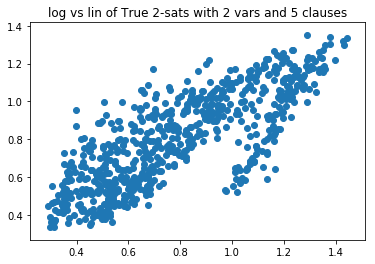

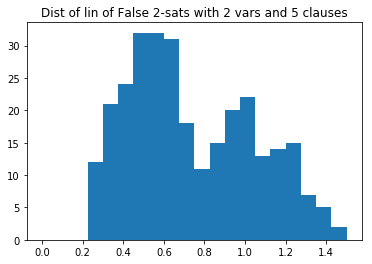

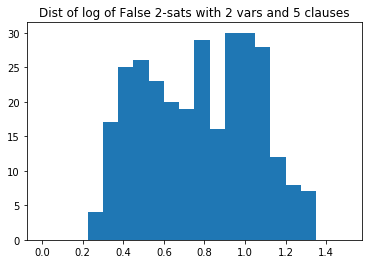

Correlation: 0.7973218560218811, p-value: 5.439835397839588e-66


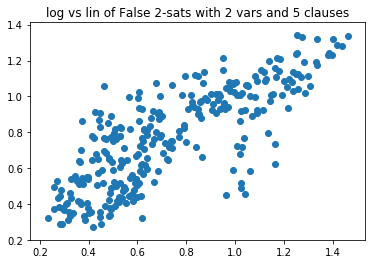

In [28]:
gen_and_print(1000, 2, 2, 5)

#trues_lin: 218; avg dist: 0.7590139762524071; stdev dist: 0.3148304414524868
#trues_log: 218; avg dist: 0.7957172884580193; stdev dist: 0.17479563084061006
#falses_lin: 782; avg dist: 0.7481973860269923; stdev dist: 0.2857043545474952
#falses_log: 782; avg dist: 0.7804464679163741; stdev dist: 0.15577660333552604
lin percent part correct: 0.5027335226072879
log percent part correct: 0.5229357798165137
random percent part correct: aprox. 90% likely to be between 0.4650507989394402 and 0.5304031065956498


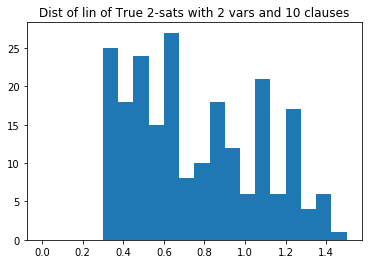

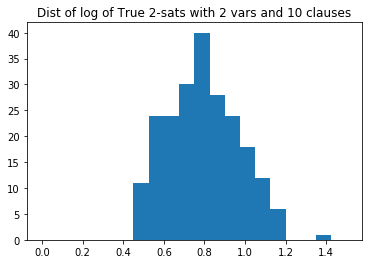

Correlation: 0.5826460123062134, p-value: 3.2580217810875485e-21


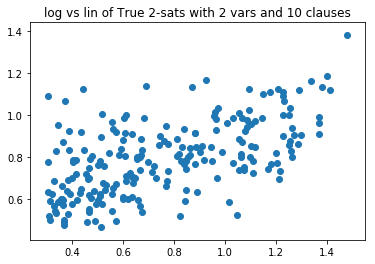

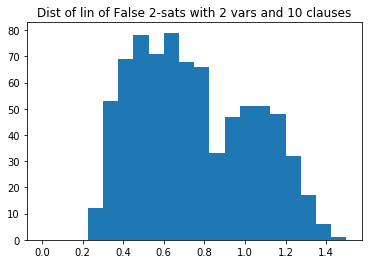

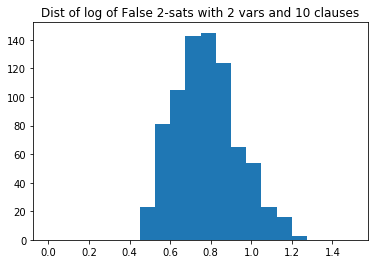

Correlation: 0.5064622759819031, p-value: 3.534036743610094e-52


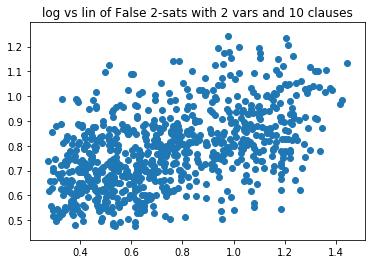

In [29]:
gen_and_print(1000, 2, 2, 10)

#trues_lin: 949; avg dist: 0.7783213941138964; stdev dist: 0.2543939892657898
#trues_log: 949; avg dist: 0.8149955005113142; stdev dist: 0.1600080903626807
#falses_lin: 51; avg dist: 0.7583677295376273; stdev dist: 0.2474933398749493
#falses_log: 51; avg dist: 0.8283871213595072; stdev dist: 0.1715961895740549
lin percent part correct: 0.5193289117543751
log percent part correct: 0.47794375916857784
random percent part correct: aprox. 90% likely to be between 0.4217442509142751 and 0.5735035847848096


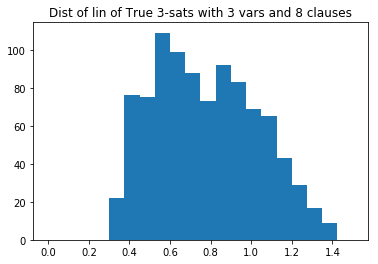

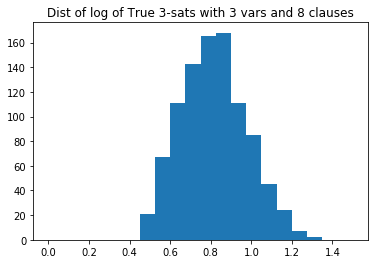

Correlation: 0.545569896697998, p-value: 1.0468182289984806e-74


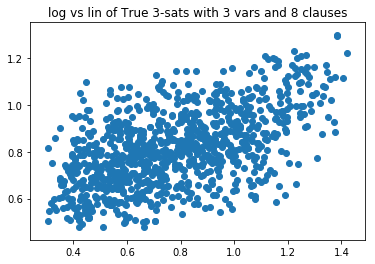

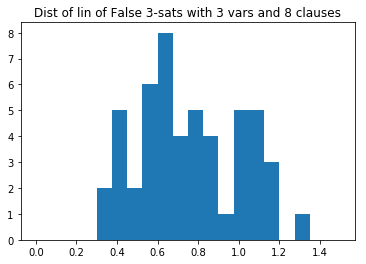

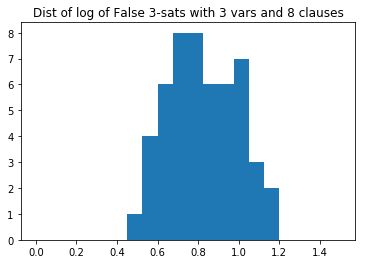

Correlation: 0.5483840107917786, p-value: 3.10042427018444e-05


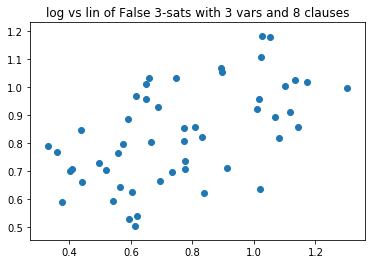

In [30]:
gen_and_print(1000, 3, 3, 8)

#trues_lin: 555; avg dist: 0.773939367940834; stdev dist: 0.26032890307692474
#trues_log: 555; avg dist: 0.785002297001916; stdev dist: 0.1173311516282827
#falses_lin: 445; avg dist: 0.801867700426766; stdev dist: 0.2640596331362701
#falses_log: 445; avg dist: 0.7767955822891064; stdev dist: 0.11780328027128188
lin percent part correct: 0.4686142322097378
log percent part correct: 0.5185747545298107
random percent part correct: aprox. 90% likely to be between 0.4671525458042312 and 0.5249721631744103


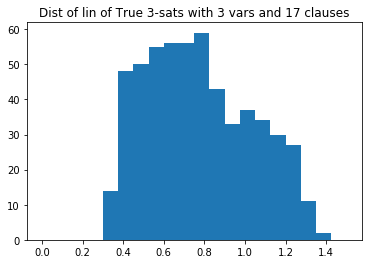

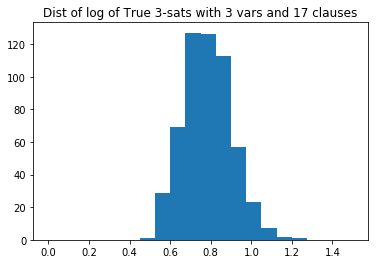

Correlation: 0.4197731912136078, p-value: 4.23756819878942e-25


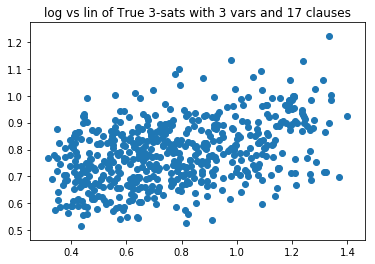

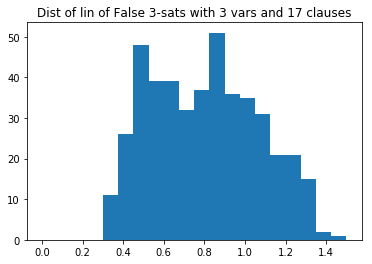

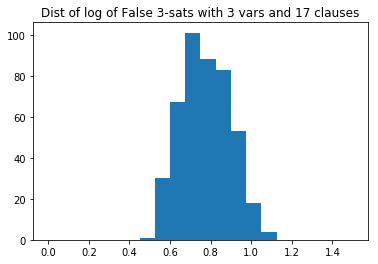

Correlation: 0.4552140235900879, p-value: 3.792831730100484e-24


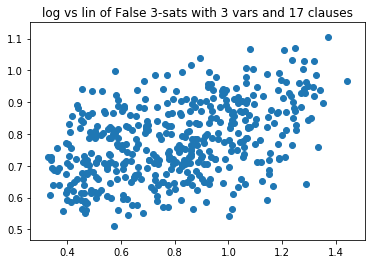

In [31]:
gen_and_print(1000, 3, 3, 17)

In [ ]:
gen_and_print(1000, 3, 5, 40)